### 这里我们使用梯度下降法来拟合房屋价格曲线

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


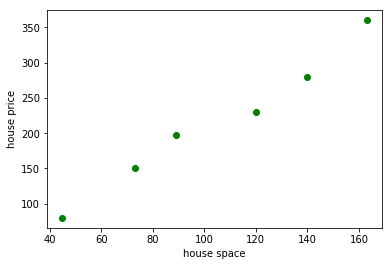

In [2]:
spaces = [45, 73, 89, 120, 140, 163]
prices = [80, 150, 198, 230, 280, 360]
spaces, prices = np.array(spaces), np.array(prices)
plt.scatter(spaces, prices, c='g')
plt.xlabel('house space')
plt.ylabel('house price')
plt.show()

## 显示房屋面积和房屋价格的散点图

使用梯度下降法我们需要假设$ h(x)$
这里我们假设 $$ h(x) = \theta_0 + \theta_1 * x \tag{1}$$ (只含有一个特征)
另损失函数为 $$ J(\theta) = \frac{1}{2*6}\sum_{i=0}^{6}\{(h_\theta(X_i)-y_i)^{2} \tag{2} $$
假设步长为 $\lambda$,则每一次的更新公式为：$$\theta_j = \theta_j - \lambda * \frac{1}{6}\sum_{i=1}^6(h_\lambda(X_i) - y_i)*X_{ij} \tag{3} $$
下面来用代码实现

 h(x) = 0.016206 + 2.078464 * x


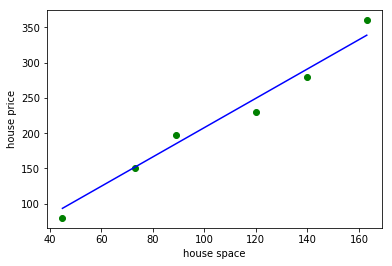

In [3]:
## theta 初始值
theta0 = 0
theta1 = 0

## 如果步长选择不对，则 theta 参数更新结果会不对
step = 0.00005

x_i0 = np.ones((len(spaces)))

# 假设函数
def h(x) :
      return theta0 + theta1 * x

# 损失函数
def calc_error() :
      return np.sum(np.power((h(spaces) - prices),2)) / 6

# 损失函数偏导数( theta 0)
def calc_delta0() :
      return step * np.sum((h(spaces) - prices) * x_i0) / 6

# 损失函数偏导数( theta 1)
def calc_delta1() :
      return step * np.sum((h(spaces) - prices) * spaces) / 6

# 循环更新 theta 值并计算误差，停止条件为
#  1. 误差小于某个值
#  2. 循环次数控制
k = 0
while True :
    delta0 = calc_delta0()
    delta1 = calc_delta1()
    theta0 = theta0 - delta0
    theta1 = theta1 - delta1
    error = calc_error()
    # print("delta [%f, %f], theta [%f, %f], error %f" % (delta0, delta1, theta0, theta1, error))
    k = k + 1
    if (k > 10 or error < 200) : 
        break


print(" h(x) = %f + %f * x" % (theta0, theta1))
    
# 使用假设函数计算出来的价格，用于画拟合曲线
y_out = h(spaces)

plt.scatter(spaces, prices, c='g')
plt.plot(spaces, y_out, c='b')
plt.xlabel('house space')
plt.ylabel('house price')
plt.show()